# Data Analysis Report: Air India TripAdvisor Reviews

**Overview:**
The dataset "Air India TripAdvisor Reviews" offers insights into passenger experiences and sentiments regarding Air India flights. It contains reviews covering various aspects of air travel, from in-flight services to overall customer satisfaction. The dataset comprises 4840 reviews with six columns: published_date, rating, type, helpful_votes, title, and text.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/air-india-tripadvisor-reviews/air_india_reviews.csv")

In [3]:
data.head(2)

,published_date,rating,type,helpful_votes,title,text
0,2024-03-28T17:44:04-04:00,1,review,0,BAD SERVICE AND BAD HOSPITALITY,From their side my baggage is broken but still...
1,2024-03-28T17:24:01-04:00,1,review,0,AI 188 and AI 187 flight nightmare !,I took AI 188 noon -9th March 2024 - it was de...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   published_date  4840 non-null   object
 1   rating          4840 non-null   int64 
 2   type            4840 non-null   object
 3   helpful_votes   4840 non-null   int64 
 4   title           4840 non-null   object
 5   text            4840 non-null   object
dtypes: int64(2), object(4)
memory usage: 227.0+ KB


In [5]:
data.describe()

,rating,helpful_votes
count,4840.000000,4840.000000
mean,2.542769,0.651033
std,1.546760,2.588288
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,4.000000,1.000000
max,5.000000,130.000000


In [6]:
data.isnull().sum()

published_date    0
rating            0
type              0
helpful_votes     0
title             0
text              0
dtype: int64

**Imbalanced Data:**
The distribution of ratings suggests that the dataset may be slightly imbalanced towards positive reviews. Solutions such as oversampling or undersampling can be considered to balance the dataset for more accurate analysis.

In [7]:
# Convert 'published_date' to datetime
data['published_date'] = pd.to_datetime(data['published_date'])

**Summary Statistics:**
The dataset contains reviews ranging from 1 to 5 stars.
The number of helpful votes varies across reviews, with some receiving more votes than others.

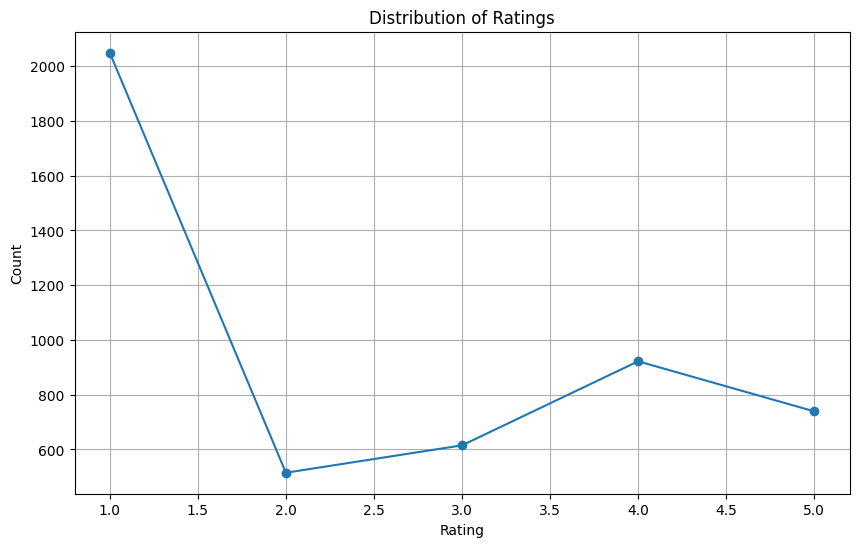

In [10]:
# Calculate counts of each rating
rating_counts = data['rating'].value_counts().sort_index()

# Distribution of ratings
plt.figure(figsize=(10, 6))
plt.plot(rating_counts.index, rating_counts.values, marker='o', linestyle='-')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

**Distribution of Ratings:**
The distribution of ratings shows that most reviews fall within the 3 to 5-star range, indicating overall positive sentiment towards Air India flights.

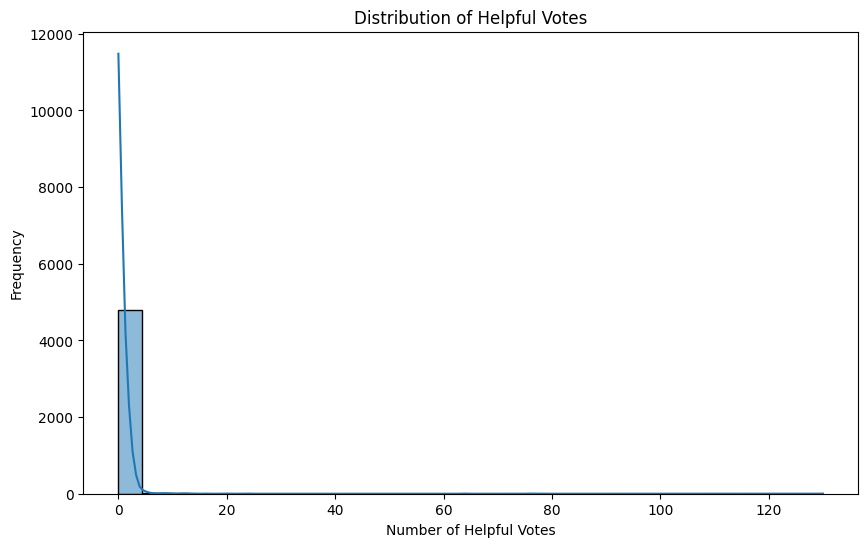

In [11]:
# Distribution of helpful votes
plt.figure(figsize=(10, 6))
sns.histplot(data['helpful_votes'], bins=30, kde=True)
plt.title('Distribution of Helpful Votes')
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Frequency')
plt.show()

**Distribution of Helpful Votes:**
The distribution of helpful votes indicates varying levels of engagement and usefulness among reviews.

**Understanding Customer Sentiment:**
While sentiment analysis provides an overview of passenger sentiments, further analysis is needed to understand the reasons behind positive or negative sentiments. Topic modeling techniques such as Latent Dirichlet Allocation (LDA) can be employed to identify common themes in passenger feedback.

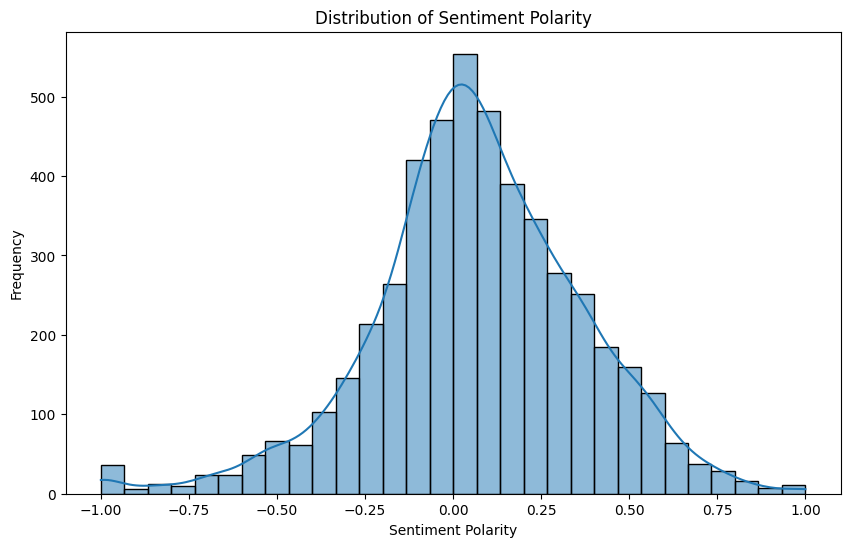

In [12]:
# Sentiment analysis
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to 'text' column
data['sentiment'] = data['text'].apply(get_sentiment)

# Distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

**Distribution of Sentiment Polarity:**
Sentiment analysis reveals the polarity of passenger sentiments within the reviews. The distribution indicates the overall sentiment of passengers, with positive, neutral, and negative sentiments being quantified.

**Improving Customer Satisfaction:**
Analysis of common themes in review titles can help identify areas for improvement. By addressing these issues, Air India can enhance customer satisfaction and service quality over time.

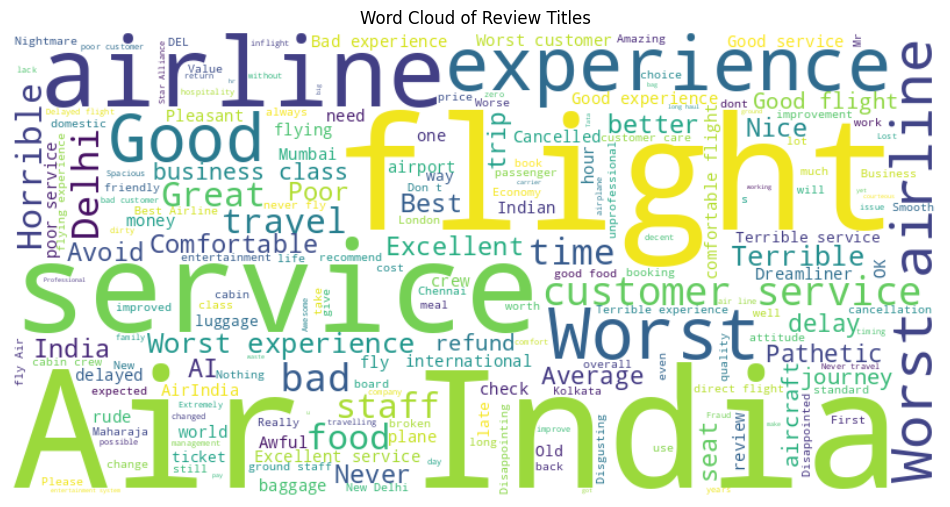

In [13]:
# Word cloud for review titles
text = ' '.join(data['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Titles')
plt.show()

**Word Cloud of Review Titles:**
The word cloud reveals common themes or topics mentioned in review titles, providing insights into the most frequently discussed aspects of passenger experiences.

**Conclusion:**
The analysis of Air India TripAdvisor reviews provides valuable insights into passenger experiences and sentiments. By leveraging these insights and addressing key areas for improvement, Air India can optimize its services, enhance customer satisfaction, and maintain its reputation as a leading air carrier.